# Data preprocessing

In [1]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
SCRIPTS_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data'

In [2]:
from glob import glob
import numpy as np
import _pickle as pickle
import PIL
from PIL import Image
from PIL import ImageOps
from tqdm import tqdm
import bcolz

In [3]:
def resize_32(image_path):
    """ chops off the top half of a 32 by 32 image so it is 16 by 16 """
    # open image and get array
    image_array = np.asarray(Image.open(image_path))
    if image_array.shape == (32, 32):
        image_array = image_array[16:,:]
        img = Image.fromarray(image_array, 'L')
        img.save(image_path)

In [4]:
%cd $DATA_HOME_DIR/train/binary
folders = ([name for name in os.listdir(".") if os.path.isdir(name)])

/home/nathan/olin/spring2017/lane_follower/src/scripts/data/train/binary


In [7]:
for folder in tqdm(folders):
    os.chdir(DATA_HOME_DIR + '/train/binary/' + folder)
    g = glob('*.png')
    for image_path in g:
        resize_32(image_path)

0it [00:00, ?it/s]


In [8]:
%cd $DATA_HOME_DIR/valid/binary
folders = ([name for name in os.listdir(".") if os.path.isdir(name)])

/home/nathan/olin/spring2017/lane_follower/src/scripts/data/valid/binary


In [9]:
for folder in tqdm(folders):
    os.chdir(DATA_HOME_DIR + '/valid/binary/' + folder)
    g = glob('*.png')
    for image_path in g:
        resize_32(image_path)

100%|██████████| 3/3 [00:00<00:00, 33.82it/s]


## Average Image

In [10]:
%cd $DATA_HOME_DIR/train/binary
folders = ([name for name in os.listdir(".") if os.path.isdir(name)])

/home/nathan/olin/spring2017/lane_follower/src/scripts/data/train/binary


In [15]:
imgs_all = []
for folder in tqdm(folders):
    os.chdir(DATA_HOME_DIR + '/train/binary/' + folder)
    g = glob('*.png')
    imgs = np.array([np.asarray(Image.open(image_path)) for image_path in g])
    img_avg = imgs.sum(axis=0) / imgs.shape[0]
    imgs_all.append(img_avg)

100%|██████████| 3/3 [00:00<00:00, 33.42it/s]


In [23]:
from matplotlib.pyplot import imshow
%matplotlib inline

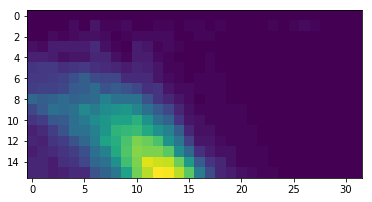

In [27]:
imshow(imgs_all[0])

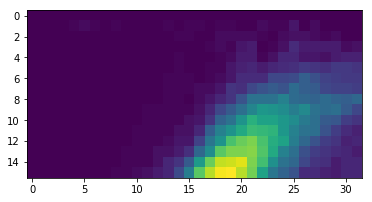

In [28]:
imshow(imgs_all[1])

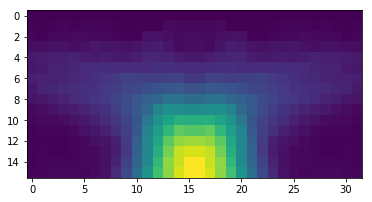

In [29]:
imshow(imgs_all[2])